<a href="https://colab.research.google.com/github/MFikriMumtaz/Graded_Challange/blob/main/h8dsft_P0W1_Muhamad_Fikri_Mumtaz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Graded Challenge 1



Nama : Muhamad Fikri Mumtaz

Batch: HCK-004

## Deskripsi

Objektif
- Melihat jumlah, rata-rata, minimum, dan maksimum kasus Terkonfirmasi, dan Meninggal untuk penderita COVID-19 di Provinsi New York, AS pada tahun 2020 hingga 2022
- Melihat jumlah, dan rata-rata kasus Terkonfirmasi, dan Meninggal untuk penderita COVID-19 di Provinsi New York, AS per quartil pada tahun 2020 hingga 2022
- Membandingkan jumlah, dan rata-rata kasus Terkonfirmasi, dan Meninggal untuk penderita COVID-19 di Provinsi New York, AS pada tahun 2020, 2021, dan 2022
- Mevisualisasikan perkembangan jumlah kasus Terkonfirmasi, dan Meninggal untuk penderita COVID-19 di Provinsi New York, AS pada tahun 2020, 2021, dan 2022
- Mevisualisasikan trend perkembangan jumlah kasus Terkonfirmasi, dan Meninggal untuk penderita COVID-19 di Provinsi New York, AS pada tahun 2020, 2021, dan 2022 per kuartil


Problem Statement:
- Bagaimana trend perkembangan jumlah kasus Terkonfirmasi, dan Meninggal untuk penderita COVID-19 di Provinsi New York, AS pada tahun 2020, 2021, dan 2022?
- Bagaimana trend perkembangan jumlah kasus Terkonfirmasi, dan Meninggal untuk penderita COVID-19 di Provinsi New York, AS pada tahun 2020, 2021, dan 2022 per kuartil?

### Working Area
- Pandas untuk melakukan analisis
- Numpy untuk melakukan perhitungan
- Big Query untuk pengambilan data
- Colab Google untuk tempat koding data
- Menggunakan program language Python dan Jupyter Notebook

### Pengambilan data menggunakan Big Query
Pengambilan data di Big Query menggunakan kode sebagai berikut:

SELECT Data_Covid.country_region, Data_Covid.province_state, Data_Covid.admin2,
Data_Covid.date, Data_Covid.confirmed, Data_Covid.deaths, Data_Covid.recovered, Data_Covid.active
FROM `bigquery-public-data.covid19_jhu_csse_eu.summary` as Data_Covid
WHERE Data_Covid.province_state = 'New York' AND Data_Covid.date between '2020-01-01'and '2022-12-31'
ORDER BY date;

Memasukkan modul yang akan digunakan dalam analisis

In [224]:
import pandas as pd #memasukkan modul pandas
import numpy as np #memasukkan modul numpy

Melakukan Data Loading dari Big Query untuk analisis data

In [3]:
data_covid_19 = pd.read_csv('https://raw.githubusercontent.com/MFikriMumtaz/Graded_Challange/main/Covid-19%20US.csv') #memasukkan data query kedalam Python
data_covid_19 #memuat value yang telah didefinisikan

,country_region,province_state,admin2,date,confirmed,deaths,recovered,active
0,US,New York,NaN,2020-03-10,173,0,0.0,NaN
1,US,New York,NaN,2020-03-11,220,0,0.0,NaN
2,US,New York,NaN,2020-03-12,328,0,0.0,NaN
3,US,New York,NaN,2020-03-13,421,0,0.0,NaN
4,US,New York,NaN,2020-03-14,525,2,0.0,NaN
...,...,...,...,...,...,...,...,...
64118,US,New York,Washington,2022-12-31,15401,136,NaN,NaN
64119,US,New York,Wayne,2022-12-31,21431,201,NaN,NaN
64120,US,New York,Westchester,2022-12-31,326527,2929,NaN,NaN
64121,US,New York,Wyoming,2022-12-31,9785,90,NaN,NaN


In [4]:
data_covid_19.describe().T #memuat informasi statistik dasar

,count,mean,std,min,25%,50%,75%,max
confirmed,64123.0,45762.372004,113761.928648,0.0,1601.0,7995.0,25055.0,929012.0
deaths,64123.0,824.618047,2244.206001,0.0,37.0,111.0,348.0,23689.0
recovered,21562.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
active,21551.0,9412.313350,26680.593609,-1059.0,127.0,604.0,3568.5,210280.0


In [5]:
data_covid_19.info() #memuat informasi tabel

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64123 entries, 0 to 64122
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_region  64123 non-null  object 
 1   province_state  64123 non-null  object 
 2   admin2          64111 non-null  object 
 3   date            64123 non-null  object 
 4   confirmed       64123 non-null  int64  
 5   deaths          64123 non-null  int64  
 6   recovered       21562 non-null  float64
 7   active          21551 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 3.9+ MB


Melakukan Cleaning Data untuk menghilangkan missing value

In [6]:
data_covid_19.isna().sum() #mencek missing value

country_region        0
province_state        0
admin2               12
date                  0
confirmed             0
deaths                0
recovered         42561
active            42572
dtype: int64

In [116]:
df = data_covid_19.drop(['recovered', 'active'], axis=1) #mendrop kolom yang tidak digunakan dalam analisis
df2 = df.replace('Unassigned', np.NaN) #mengganti value tertentu
df1 = df2.fillna(method = 'bfill') #mengisi missing value dengan teknik bfill

In [63]:
df1

,country_region,province_state,admin2,date,confirmed,deaths
0,US,New York,New York City,2020-03-10,173,0
1,US,New York,New York City,2020-03-11,220,0
2,US,New York,New York City,2020-03-12,328,0
3,US,New York,New York City,2020-03-13,421,0
4,US,New York,New York City,2020-03-14,525,2
...,...,...,...,...,...,...
64118,US,New York,Washington,2022-12-31,15401,136
64119,US,New York,Wayne,2022-12-31,21431,201
64120,US,New York,Westchester,2022-12-31,326527,2929
64121,US,New York,Wyoming,2022-12-31,9785,90


In [64]:
df1.isna().sum() #melihat jumlah missing value

country_region    0
province_state    0
admin2            0
date              0
confirmed         0
deaths            0
dtype: int64

Melakukan Eksplorasi Data 

In [65]:
df1_rename = df1.rename(                      #merubah nama kolom
    columns={"country_region": "Negara", 
             "province_state": "Provinsi", 
             "admin2": "Kota",
             "date": "Tanggal",
             "confirmed": "Terkonfirmasi",
             "deaths": "Meninggal"}
)
df1_rename.head()                             #memuat data yang telah didefinisikan

,Negara,Provinsi,Kota,Tanggal,Terkonfirmasi,Meninggal
0,US,New York,New York City,2020-03-10,173,0
1,US,New York,New York City,2020-03-11,220,0
2,US,New York,New York City,2020-03-12,328,0
3,US,New York,New York City,2020-03-13,421,0
4,US,New York,New York City,2020-03-14,525,2


In [66]:
covid_19_2020 = df1_rename[             #melakukan pengelompokan data berdasarkan kolom tertentu
    (df1["date"] > '2020-01-01') &
    (df1["date"] < '2020-12-31')
]
covid_19_2021 = df1_rename[             #melakukan pengelompokan data berdasarkan kolom tertentu
    (df1["date"] > '2021-01-01') &
    (df1["date"] < '2021-12-31')
]
covid_19_2022 = df1_rename[             #melakukan pengelompokan data berdasarkan kolom tertentu
    (df1["date"] > '2022-01-01') &
    (df1["date"] < '2022-12-31')
]

In [67]:
covid_19_2020 #memuat data yang telah didefinisikan

,Negara,Provinsi,Kota,Tanggal,Terkonfirmasi,Meninggal
0,US,New York,New York City,2020-03-10,173,0
1,US,New York,New York City,2020-03-11,220,0
2,US,New York,New York City,2020-03-12,328,0
3,US,New York,New York City,2020-03-13,421,0
4,US,New York,New York City,2020-03-14,525,2
...,...,...,...,...,...,...
17334,US,New York,Washington,2020-12-30,805,15
17335,US,New York,Wayne,2020-12-30,2477,35
17336,US,New York,Westchester,2020-12-30,68702,1661
17337,US,New York,Wyoming,2020-12-30,1321,21


In [68]:
covid_19_2020.describe()  #memuat statistik dasar

,Terkonfirmasi,Meninggal
count,17339.000000,17339.000000
mean,7157.413519,480.875541
std,23307.637821,2176.812787
min,0.000000,0.000000
25%,107.000000,3.000000
50%,348.000000,14.000000
75%,1879.000000,66.000000
max,233969.000000,23689.000000


In [69]:
covid_19_2021 #memuat data yang telah didefinisikan

,Negara,Provinsi,Kota,Tanggal,Terkonfirmasi,Meninggal
17467,US,New York,Albany,2021-01-02,12199,208
17468,US,New York,Allegany,2021-01-02,1894,73
17469,US,New York,Bronx,2021-01-02,87727,5137
17470,US,New York,Broome,2021-01-02,8487,208
17471,US,New York,Cattaraugus,2021-01-02,2630,44
...,...,...,...,...,...,...
40694,US,New York,Washington,2021-12-30,8248,91
40695,US,New York,Wayne,2021-12-30,12231,125
40696,US,New York,Westchester,2021-12-30,179080,2399
40697,US,New York,Wyoming,2021-12-30,6198,74


In [70]:
covid_19_2021.describe() #memuat statistik dasar

,Terkonfirmasi,Meninggal
count,23232.000000,23232.000000
mean,33221.584582,817.734547
std,64651.684698,1984.479643
min,0.000000,0.000000
25%,3460.000000,60.000000
50%,6338.500000,99.000000
75%,21933.250000,371.000000
max,456270.000000,11160.000000


In [71]:
covid_19_2022 #memuat data yang telah didefinisikan

,Negara,Provinsi,Kota,Tanggal,Terkonfirmasi,Meninggal
40827,US,New York,Albany,2022-01-02,41133,439
40828,US,New York,Allegany,2022-01-02,6979,137
40829,US,New York,Bronx,2022-01-02,288556,6925
40830,US,New York,Broome,2022-01-02,33512,467
40831,US,New York,Cattaraugus,2022-01-02,11497,189
...,...,...,...,...,...,...
64054,US,New York,Washington,2022-12-30,15395,136
64055,US,New York,Wayne,2022-12-30,21413,201
64056,US,New York,Westchester,2022-12-30,326202,2929
64057,US,New York,Wyoming,2022-12-30,9782,90


In [72]:
covid_19_2022.describe() #memuat statistik dasar

,Terkonfirmasi,Meninggal
count,23232.000000,23232.000000
mean,87076.780088,1087.771307
std,167255.843328,2492.058934
min,0.000000,1.000000
25%,10389.000000,113.000000
50%,19206.000000,185.000000
75%,56949.250000,569.000000
max,929012.000000,13875.000000


Mengekstrak data tabel untuk mengetahui jumlah, min, max, dan rata-rata data terkonfirmasi dan meninggal

In [255]:
print('Jumlah Kasus Terkonfirmasi Covid-19 Tahun 2020 : ',covid_19_2020['Terkonfirmasi'].sum()) #memuat nilai jumlah terkonfirmasi
print('Jumlah Kasus Meninggal     Covid-19 Tahun 2020 : ',covid_19_2020['Meninggal'].sum())     #memuat nilai jumlah meninggal
print('Jumlah Kasus Terkonfirmasi Covid-19 Tahun 2021 : ',covid_19_2021['Terkonfirmasi'].sum()) #memuat nilai jumlah terkonfirmasi
print('Jumlah Kasus Meninggal     Covid-19 Tahun 2021 : ',covid_19_2021['Meninggal'].sum())     #memuat nilai jumlah meninggal
print('Jumlah Kasus Terkonfirmasi Covid-19 Tahun 2022 : ',covid_19_2022['Terkonfirmasi'].sum()) #memuat nilai jumlah terkonfirmasi
print('Jumlah Kasus Meninggal     Covid-19 Tahun 2022 : ',covid_19_2022['Meninggal'].sum())     #memuat nilai jumlah meninggal

Jumlah Kasus Terkonfirmasi Covid-19 Tahun 2020 :  124102393
Jumlah Kasus Meninggal     Covid-19 Tahun 2020 :  8337901
Jumlah Kasus Terkonfirmasi Covid-19 Tahun 2021 :  771803853
Jumlah Kasus Meninggal     Covid-19 Tahun 2021 :  18997609
Jumlah Kasus Terkonfirmasi Covid-19 Tahun 2022 :  2022967755
Jumlah Kasus Meninggal     Covid-19 Tahun 2022 :  25271103


In [256]:
print('Rata-Rata Kasus Terkonfirmasi  Covid-19 Tahun 2020  : ',covid_19_2020['Terkonfirmasi'].mean()) #memuat nilai rata-rata terkonfirmasi
print('Rata-Rata Kasus Meninggal      Covid-19 Tahun 2020  : ',covid_19_2020['Meninggal'].mean())     #memuat nilai rata-rata meninggal
print('Rata-Rata Kasus Terkonfirmasi  Covid-19 Tahun 2021  : ',covid_19_2021['Terkonfirmasi'].mean()) #memuat nilai rata-rata terkonfirmasi
print('Rata-Rata Kasus Meninggal      Covid-19 Tahun 2021  : ',covid_19_2021['Meninggal'].mean())     #memuat nilai rata-rata meninggal
print('Rata-Rata Kasus Terkonfirmasi  Covid-19 Tahun 2022  : ',covid_19_2022['Terkonfirmasi'].mean()) #memuat nilai rata-rata terkonfirmasi
print('Rata-Rata Kasus Meninggal      Covid-19 Tahun 2022  : ',covid_19_2022['Meninggal'].mean())     #memuat nilai rata-rata meninggal

Rata-Rata Kasus Terkonfirmasi  Covid-19 Tahun 2020  :  7157.413518657362
Rata-Rata Kasus Meninggal      Covid-19 Tahun 2020  :  480.875540688621
Rata-Rata Kasus Terkonfirmasi  Covid-19 Tahun 2021  :  33221.58458161157
Rata-Rata Kasus Meninggal      Covid-19 Tahun 2021  :  817.7345471763085
Rata-Rata Kasus Terkonfirmasi  Covid-19 Tahun 2022  :  87076.78008780992
Rata-Rata Kasus Meninggal      Covid-19 Tahun 2022  :  1087.7713068181818


In [257]:
print('Jumlah Terkecil Kasus Terkonfirmasi  Covid-19 Tahun 2020  : ',covid_19_2020['Terkonfirmasi'].min()) #memuat nilai minimum terkonfirmasi
print('Jumlah Terkecil Kasus Meninggal      Covid-19 Tahun 2020  : ',covid_19_2020['Meninggal'].min())     #memuat nilai minimum meninggal
print('Jumlah Terkecil Kasus Terkonfirmasi  Covid-19 Tahun 2021  : ',covid_19_2021['Terkonfirmasi'].min()) #memuat nilai minimum terkonfirmasi
print('Jumlah Terkecil Kasus Meninggal      Covid-19 Tahun 2021  : ',covid_19_2021['Meninggal'].min())     #memuat nilai minimum meninggal
print('Jumlah Terkecil Kasus Terkonfirmasi  Covid-19 Tahun 2022  : ',covid_19_2022['Terkonfirmasi'].min()) #memuat nilai minimum terkonfirmasi
print('Jumlah Terkecil Kasus Meninggal      Covid-19 Tahun 2022  : ',covid_19_2022['Meninggal'].min())     #memuat nilai minimum meninggal

Jumlah Terkecil Kasus Terkonfirmasi  Covid-19 Tahun 2020  :  0
Jumlah Terkecil Kasus Meninggal      Covid-19 Tahun 2020  :  0
Jumlah Terkecil Kasus Terkonfirmasi  Covid-19 Tahun 2021  :  0
Jumlah Terkecil Kasus Meninggal      Covid-19 Tahun 2021  :  0
Jumlah Terkecil Kasus Terkonfirmasi  Covid-19 Tahun 2022  :  0
Jumlah Terkecil Kasus Meninggal      Covid-19 Tahun 2022  :  1


In [258]:
print('Jumlah Terbanyak Kasus Terkonfirmasi Covid-19 Tahun 2020  : ',covid_19_2020['Terkonfirmasi'].max())  #memuat nilai maksimum terkonfirmasi
print('Jumlah Terbanyak Kasus Meninggal     Covid-19 Tahun 2020  : ',covid_19_2020['Meninggal'].max())      #memuat nilai maksimum meninggal
print('Jumlah Terbanyak Kasus Terkonfirmasi Covid-19 Tahun 2021  : ',covid_19_2021['Terkonfirmasi'].max())  #memuat nilai maksimum terkonfirmasi
print('Jumlah Terbanyak Kasus Meninggal     Covid-19 Tahun 2021  : ',covid_19_2021['Meninggal'].max())      #memuat nilai maksimum meninggal
print('Jumlah Terbanyak Kasus Terkonfirmasi Covid-19 Tahun 2022  : ',covid_19_2022['Terkonfirmasi'].max())  #memuat nilai maksimum terkonfirmasi
print('Jumlah Terbanyak Kasus Meninggal     Covid-19 Tahun 2022  : ',covid_19_2022['Meninggal'].max())      #memuat nilai maksimum meninggal

Jumlah Terbanyak Kasus Terkonfirmasi Covid-19 Tahun 2020  :  233969
Jumlah Terbanyak Kasus Meninggal     Covid-19 Tahun 2020  :  23689
Jumlah Terbanyak Kasus Terkonfirmasi Covid-19 Tahun 2021  :  456270
Jumlah Terbanyak Kasus Meninggal     Covid-19 Tahun 2021  :  11160
Jumlah Terbanyak Kasus Terkonfirmasi Covid-19 Tahun 2022  :  929012
Jumlah Terbanyak Kasus Meninggal     Covid-19 Tahun 2022  :  13875


Mendapatkan Jumlah, Minimum, Maksimum, dan Rata-rata orang "Terkonfirmasi" dan "Meninggal" pada rentang tahun 2020 hingga 2022

In [251]:
df_covid_statistik = {'Tahun': ['2020','2021','2022'],                    #membuat tabel baru dengan pd.dataframe
            'Jumlah Terkonfirmasi': [124102393, 771803853, 2022967755],
            'Minimum Terkonfirmasi': [0, 0, 0,],
            'Maksimum Terkonfirmasi': [233969, 456270, 929012],
            'Rata-Rata Terkonfirmasi': [7157.41, 33221.58, 87076.78],
            'Jumlah Meninggal': [8337901, 18997609, 25271103],
            'Minimum Meninggal': [0, 0, 1],
            'Maksimum Meninggal': [23689, 11160, 13875],
            'Rata-Rata Meninggal': [480.87, 817.73, 1087.77]
}
df_covid_2 = pd.DataFrame(df_covid_statistik)       #membuat tabel baru dengan pd.dataframe
pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 2)
df_covid_2                                          #membuat tabel baru dengan pd.dataframe

,Tahun,Jumlah Terkonfirmasi,Minimum Terkonfirmasi,Maksimum Terkonfirmasi,Rata-Rata Terkonfirmasi,Jumlah Meninggal,Minimum Meninggal,Maksimum Meninggal,Rata-Rata Meninggal
0,2020,124102393,0,233969,7157.41,8337901,0,23689,480.87
1,2021,771803853,0,456270,33221.58,18997609,0,11160,817.73
2,2022,2022967755,0,929012,87076.78,25271103,1,13875,1087.77


### Mencari Data Covid-19 Perkuartil

In [155]:
data_kuartil = df1.copy() #membuat copy data

In [92]:
data_kuartil_1_2020 = df1_rename[     #membuat definisi untuk data kuartil
    (df1["date"] >= '2020-01-01') &
    (df1["date"] <= '2020-03-31')
]
data_kuartil_2_2020 = df1_rename[
    (df1["date"] >= '2020-04-01') &
    (df1["date"] <= '2020-06-30')
]
data_kuartil_3_2020 = df1_rename[
    (df1["date"] >= '2020-07-01') &
    (df1["date"] <= '2020-09-31')
]
data_kuartil_4_2020 = df1_rename[
    (df1["date"] >= '2020-10-01') &
    (df1["date"] <= '2020-12-31')
]

In [93]:
print(data_kuartil_1_2020)  #memuat data kuartil
print(data_kuartil_2_2020)
print(data_kuartil_3_2020)
print(data_kuartil_4_2020)

    Negara  Provinsi           Kota     Tanggal  Terkonfirmasi  Meninggal
0       US  New York  New York City  2020-03-10            173          0
1       US  New York  New York City  2020-03-11            220          0
2       US  New York  New York City  2020-03-12            328          0
3       US  New York  New York City  2020-03-13            421          0
4       US  New York  New York City  2020-03-14            525          2
..     ...       ...            ...         ...            ...        ...
631     US  New York         Warren  2020-03-31             18          0
632     US  New York     Washington  2020-03-31              9          0
633     US  New York          Wayne  2020-03-31             15          0
634     US  New York    Westchester  2020-03-31           9967         10
635     US  New York        Wyoming  2020-03-31              8          1

[636 rows x 6 columns]
     Negara  Provinsi         Kota     Tanggal  Terkonfirmasi  Meninggal
636      US  Ne

In [94]:
data_kuartil_1_2021 = df1_rename[     #membuat definisi untuk data kuartil
    (df1["date"] >= '2021-01-01') &
    (df1["date"] <= '2021-03-31')
]
data_kuartil_2_2021 = df1_rename[
    (df1["date"] >= '2021-03-01') &
    (df1["date"] <= '2021-06-30')
]
data_kuartil_3_2021 = df1_rename[
    (df1["date"] >= '2021-07-01') &
    (df1["date"] <= '2021-09-31')
]
data_kuartil_4_2021 = df1_rename[
    (df1["date"] >= '2021-10-01') &
    (df1["date"] <= '2021-12-31')
]

In [95]:
print(data_kuartil_1_2021)    #memuat data kuartil
print(data_kuartil_2_2021)
print(data_kuartil_3_2021)
print(data_kuartil_4_2021)

      Negara  Provinsi         Kota     Tanggal  Terkonfirmasi  Meninggal
17403     US  New York       Albany  2021-01-01          11917        205
17404     US  New York     Allegany  2021-01-01           1876         73
17405     US  New York        Bronx  2021-01-01          86505       5140
17406     US  New York       Broome  2021-01-01           8301        206
17407     US  New York  Cattaraugus  2021-01-01           2585         44
...      ...       ...          ...         ...            ...        ...
23158     US  New York   Washington  2021-03-31           2676         55
23159     US  New York        Wayne  2021-03-31           4842         66
23160     US  New York  Westchester  2021-03-31         119732       2198
23161     US  New York      Wyoming  2021-03-31           3069         50
23162     US  New York        Yates  2021-03-31           1058         26

[5760 rows x 6 columns]
      Negara  Provinsi         Kota     Tanggal  Terkonfirmasi  Meninggal
21179     US 

In [96]:
data_kuartil_1_2022 = df1_rename[     #membuat definisi untuk data kuartil
    (df1["date"] >= '2022-01-01') &
    (df1["date"] <= '2022-03-31')
]
data_kuartil_2_2022 = df1_rename[
    (df1["date"] >= '2022-03-01') &
    (df1["date"] <= '2022-06-30')
]
data_kuartil_3_2022 = df1_rename[
    (df1["date"] >= '2022-07-01') &
    (df1["date"] <= '2022-09-31')
]
data_kuartil_4_2022 = df1_rename[
    (df1["date"] >= '2022-10-01') &
    (df1["date"] <= '2022-12-31')
]

In [97]:
print(data_kuartil_1_2022)      #memuat data kuartil
print(data_kuartil_2_2022)
print(data_kuartil_3_2022)
print(data_kuartil_4_2022)

      Negara  Provinsi         Kota     Tanggal  Terkonfirmasi  Meninggal
40763     US  New York       Albany  2022-01-01          41133        439
40764     US  New York     Allegany  2022-01-01           6979        137
40765     US  New York        Bronx  2022-01-01         281573       6913
40766     US  New York       Broome  2022-01-01          33512        466
40767     US  New York  Cattaraugus  2022-01-01          11497        189
...      ...       ...          ...         ...            ...        ...
46518     US  New York   Washington  2022-03-31          12035        113
46519     US  New York        Wayne  2022-03-31          17155        171
46520     US  New York  Westchester  2022-03-31         250208       2702
46521     US  New York      Wyoming  2022-03-31           8266         82
46522     US  New York        Yates  2022-03-31           3369         39

[5760 rows x 6 columns]
      Negara  Provinsi         Kota     Tanggal  Terkonfirmasi  Meninggal
44539     US 

In [205]:
print('Jumlah Kasus Terkonfirmasi Covid-19 Q1 Tahun 2020 : ',data_kuartil_1_2020['Terkonfirmasi'].sum())  #memuat jumlah terkonfirmasi
print('Jumlah Kasus Meninggal     Covid-19 Q1 Tahun 2020 : ',data_kuartil_1_2020['Meninggal'].sum())      #memuat jumlah meninggal    
print('Jumlah Kasus Terkonfirmasi Covid-19 Q2 Tahun 2020 : ',data_kuartil_2_2020['Terkonfirmasi'].sum())  #memuat jumlah terkonfirmasi
print('Jumlah Kasus Meninggal     Covid-19 Q2 Tahun 2020 : ',data_kuartil_2_2020['Meninggal'].sum())      #memuat jumlah meninggal
print('Jumlah Kasus Terkonfirmasi Covid-19 Q3 Tahun 2020 : ',data_kuartil_3_2020['Terkonfirmasi'].sum())  #memuat jumlah terkonfirmasi
print('Jumlah Kasus Meninggal     Covid-19 Q3 Tahun 2020 : ',data_kuartil_3_2020['Meninggal'].sum())      #memuat jumlah meninggal
print('Jumlah Kasus Terkonfirmasi Covid-19 Q4 Tahun 2020 : ',data_kuartil_4_2020['Terkonfirmasi'].sum())  #memuat jumlah terkonfirmasi
print('Jumlah Kasus Meninggal     Covid-19 Q4 Tahun 2020 : ',data_kuartil_4_2020['Meninggal'].sum())      #memuat jumlah meninggal

Jumlah Kasus Terkonfirmasi Covid-19 Q1 Tahun 2020 :  463465
Jumlah Kasus Meninggal     Covid-19 Q1 Tahun 2020 :  6323
Jumlah Kasus Terkonfirmasi Covid-19 Q2 Tahun 2020 :  28478781
Jumlah Kasus Meninggal     Covid-19 Q2 Tahun 2020 :  2181874
Jumlah Kasus Terkonfirmasi Covid-19 Q3 Tahun 2020 :  39121586
Jumlah Kasus Meninggal     Covid-19 Q3 Tahun 2020 :  3014494
Jumlah Kasus Terkonfirmasi Covid-19 Q4 Tahun 2020 :  57017344
Jumlah Kasus Meninggal     Covid-19 Q4 Tahun 2020 :  3173193


In [261]:
print('Jumlah Kasus Terkonfirmasi Covid-19 Q1 Tahun 2020 : ',data_kuartil_1_2020['Terkonfirmasi'].mean()) #memuat rata-rata terkonfirmasi
print('Jumlah Kasus Meninggal     Covid-19 Q1 Tahun 2020 : ',data_kuartil_1_2020['Meninggal'].mean())     #memuat rata-rata meninggal
print('Jumlah Kasus Terkonfirmasi Covid-19 Q2 Tahun 2020 : ',data_kuartil_2_2020['Terkonfirmasi'].mean()) #memuat rata-rata terkonfirmasi
print('Jumlah Kasus Meninggal     Covid-19 Q2 Tahun 2020 : ',data_kuartil_2_2020['Meninggal'].mean())     #memuat rata-rata meninggal
print('Jumlah Kasus Terkonfirmasi Covid-19 Q3 Tahun 2020 : ',data_kuartil_3_2020['Terkonfirmasi'].mean()) #memuat rata-rata terkonfirmasi
print('Jumlah Kasus Meninggal     Covid-19 Q3 Tahun 2020 : ',data_kuartil_3_2020['Meninggal'].mean())     #memuat rata-rata meninggal
print('Jumlah Kasus Terkonfirmasi Covid-19 Q4 Tahun 2020 : ',data_kuartil_4_2020['Terkonfirmasi'].mean()) #memuat rata-rata terkonfirmasi
print('Jumlah Kasus Meninggal     Covid-19 Q4 Tahun 2020 : ',data_kuartil_4_2020['Meninggal'].mean())     #memuat rata-rata meninggal

Jumlah Kasus Terkonfirmasi Covid-19 Q1 Tahun 2020 :  728.7185534591194
Jumlah Kasus Meninggal     Covid-19 Q1 Tahun 2020 :  9.94182389937107
Jumlah Kasus Terkonfirmasi Covid-19 Q2 Tahun 2020 :  5305.287071535023
Jumlah Kasus Meninggal     Covid-19 Q2 Tahun 2020 :  406.45938897168406
Jumlah Kasus Terkonfirmasi Covid-19 Q3 Tahun 2020 :  7046.395172910663
Jumlah Kasus Meninggal     Covid-19 Q3 Tahun 2020 :  542.9564121037464
Jumlah Kasus Terkonfirmasi Covid-19 Q4 Tahun 2020 :  9751.555327518385
Jumlah Kasus Meninggal     Covid-19 Q4 Tahun 2020 :  542.704463827604


In [100]:
print('Jumlah Kasus Terkonfirmasi Covid-19 Q1 Tahun 2021 : ',data_kuartil_1_2021['Terkonfirmasi'].sum())  #memuat jumlah terkonfirmasi
print('Jumlah Kasus Meninggal     Covid-19 Q1 Tahun 2021 : ',data_kuartil_1_2021['Meninggal'].sum())      #memuat jumlah meninggal
print('Jumlah Kasus Terkonfirmasi Covid-19 Q2 Tahun 2021 : ',data_kuartil_2_2021['Terkonfirmasi'].sum())  #memuat jumlah terkonfirmasi
print('Jumlah Kasus Meninggal     Covid-19 Q2 Tahun 2021 : ',data_kuartil_2_2021['Meninggal'].sum())      #memuat jumlah meninggal
print('Jumlah Kasus Terkonfirmasi Covid-19 Q3 Tahun 2021 : ',data_kuartil_3_2021['Terkonfirmasi'].sum())  #memuat jumlah terkonfirmasi
print('Jumlah Kasus Meninggal     Covid-19 Q3 Tahun 2021 : ',data_kuartil_3_2021['Meninggal'].sum())      #memuat jumlah meninggal
print('Jumlah Kasus Terkonfirmasi Covid-19 Q4 Tahun 2021 : ',data_kuartil_4_2021['Terkonfirmasi'].sum())  #memuat jumlah terkonfirmasi
print('Jumlah Kasus Meninggal     Covid-19 Q4 Tahun 2021 : ',data_kuartil_4_2021['Meninggal'].sum())      #memuat jumlah meninggal

Jumlah Kasus Terkonfirmasi Covid-19 Q1 Tahun 2021 :  135275008
Jumlah Kasus Meninggal     Covid-19 Q1 Tahun 2021 :  4070180
Jumlah Kasus Terkonfirmasi Covid-19 Q2 Tahun 2021 :  241598908
Jumlah Kasus Meninggal     Covid-19 Q2 Tahun 2021 :  6308659
Jumlah Kasus Terkonfirmasi Covid-19 Q3 Tahun 2021 :  205124782
Jumlah Kasus Meninggal     Covid-19 Q3 Tahun 2021 :  4981008
Jumlah Kasus Terkonfirmasi Covid-19 Q4 Tahun 2021 :  248730000
Jumlah Kasus Meninggal     Covid-19 Q4 Tahun 2021 :  5255982


In [262]:
print('Jumlah Kasus Terkonfirmasi Covid-19 Q1 Tahun 2021 : ',data_kuartil_1_2021['Terkonfirmasi'].mean()) #memuat rata-rata terkonfirmasi
print('Jumlah Kasus Meninggal     Covid-19 Q1 Tahun 2021 : ',data_kuartil_1_2021['Meninggal'].mean())     #memuat rata-rata meninggal
print('Jumlah Kasus Terkonfirmasi Covid-19 Q2 Tahun 2021 : ',data_kuartil_2_2021['Terkonfirmasi'].mean()) #memuat rata-rata terkonfirmasi
print('Jumlah Kasus Meninggal     Covid-19 Q2 Tahun 2021 : ',data_kuartil_2_2021['Meninggal'].mean())     #memuat rata-rata meninggal
print('Jumlah Kasus Terkonfirmasi Covid-19 Q3 Tahun 2021 : ',data_kuartil_3_2021['Terkonfirmasi'].mean()) #memuat rata-rata terkonfirmasi
print('Jumlah Kasus Meninggal     Covid-19 Q3 Tahun 2021 : ',data_kuartil_3_2021['Meninggal'].mean())     #memuat rata-rata meninggal
print('Jumlah Kasus Terkonfirmasi Covid-19 Q4 Tahun 2021 : ',data_kuartil_4_2021['Terkonfirmasi'].mean()) #memuat rata-rata terkonfirmasi
print('Jumlah Kasus Meninggal     Covid-19 Q4 Tahun 2021 : ',data_kuartil_4_2021['Meninggal'].mean())     #memuat rata-rata meninggal

Jumlah Kasus Terkonfirmasi Covid-19 Q1 Tahun 2021 :  23485.244444444445
Jumlah Kasus Meninggal     Covid-19 Q1 Tahun 2021 :  706.6284722222222
Jumlah Kasus Terkonfirmasi Covid-19 Q2 Tahun 2021 :  30942.483094262294
Jumlah Kasus Meninggal     Covid-19 Q2 Tahun 2021 :  807.9737448770492
Jumlah Kasus Terkonfirmasi Covid-19 Q3 Tahun 2021 :  34837.768682065216
Jumlah Kasus Meninggal     Covid-19 Q3 Tahun 2021 :  845.9592391304348
Jumlah Kasus Terkonfirmasi Covid-19 Q4 Tahun 2021 :  42243.546195652176
Jumlah Kasus Meninggal     Covid-19 Q4 Tahun 2021 :  892.6599864130435


In [101]:
print('Jumlah Kasus Terkonfirmasi Covid-19 Q1 Tahun 2022 : ',data_kuartil_1_2022['Terkonfirmasi'].sum())  #memuat jumlah terkonfirmasi
print('Jumlah Kasus Meninggal     Covid-19 Q1 Tahun 2022 : ',data_kuartil_1_2022['Meninggal'].sum())      #memuat jumlah meninggal
print('Jumlah Kasus Terkonfirmasi Covid-19 Q2 Tahun 2022 : ',data_kuartil_2_2022['Terkonfirmasi'].sum())  #memuat jumlah terkonfirmasi
print('Jumlah Kasus Meninggal     Covid-19 Q2 Tahun 2022 : ',data_kuartil_2_2022['Meninggal'].sum())      #memuat jumlah meninggal
print('Jumlah Kasus Terkonfirmasi Covid-19 Q3 Tahun 2022 : ',data_kuartil_3_2022['Terkonfirmasi'].sum())  #memuat jumlah terkonfirmasi
print('Jumlah Kasus Meninggal     Covid-19 Q3 Tahun 2022 : ',data_kuartil_3_2022['Meninggal'].sum())      #memuat jumlah meninggal
print('Jumlah Kasus Terkonfirmasi Covid-19 Q4 Tahun 2022 : ',data_kuartil_4_2022['Terkonfirmasi'].sum())  #memuat jumlah terkonfirmasi
print('Jumlah Kasus Meninggal     Covid-19 Q4 Tahun 2022 : ',data_kuartil_4_2022['Meninggal'].sum())      #memuat jumlah meninggal

Jumlah Kasus Terkonfirmasi Covid-19 Q1 Tahun 2022 :  425806919
Jumlah Kasus Meninggal     Covid-19 Q1 Tahun 2022 :  5885810
Jumlah Kasus Terkonfirmasi Covid-19 Q2 Tahun 2022 :  636379340
Jumlah Kasus Meninggal     Covid-19 Q2 Tahun 2022 :  8353650
Jumlah Kasus Terkonfirmasi Covid-19 Q3 Tahun 2022 :  542242539
Jumlah Kasus Meninggal     Covid-19 Q3 Tahun 2022 :  6505714
Jumlah Kasus Terkonfirmasi Covid-19 Q4 Tahun 2022 :  582287039
Jumlah Kasus Meninggal     Covid-19 Q4 Tahun 2022 :  6760341


In [263]:
print('Jumlah Kasus Terkonfirmasi Covid-19 Q1 Tahun 2022 : ',data_kuartil_1_2022['Terkonfirmasi'].mean()) #memuat rata-rata terkonfirmasi
print('Jumlah Kasus Meninggal     Covid-19 Q1 Tahun 2022 : ',data_kuartil_1_2022['Meninggal'].mean())     #memuat rata-rata meninggal
print('Jumlah Kasus Terkonfirmasi Covid-19 Q2 Tahun 2022 : ',data_kuartil_2_2022['Terkonfirmasi'].mean()) #memuat rata-rata terkonfirmasi
print('Jumlah Kasus Meninggal     Covid-19 Q2 Tahun 2022 : ',data_kuartil_2_2022['Meninggal'].mean())     #memuat rata-rata meninggal
print('Jumlah Kasus Terkonfirmasi Covid-19 Q3 Tahun 2022 : ',data_kuartil_3_2022['Terkonfirmasi'].mean()) #memuat rata-rata terkonfirmasi
print('Jumlah Kasus Meninggal     Covid-19 Q3 Tahun 2022 : ',data_kuartil_3_2022['Meninggal'].mean())     #memuat rata-rata meninggal
print('Jumlah Kasus Terkonfirmasi Covid-19 Q4 Tahun 2022 : ',data_kuartil_4_2022['Terkonfirmasi'].mean()) #memuat rata-rata terkonfirmasi
print('Jumlah Kasus Meninggal     Covid-19 Q4 Tahun 2022 : ',data_kuartil_4_2022['Meninggal'].mean())     #memuat rata-rata meninggal

Jumlah Kasus Terkonfirmasi Covid-19 Q1 Tahun 2022 :  73924.81232638888
Jumlah Kasus Meninggal     Covid-19 Q1 Tahun 2022 :  1021.8420138888889
Jumlah Kasus Terkonfirmasi Covid-19 Q2 Tahun 2022 :  81503.50153688525
Jumlah Kasus Meninggal     Covid-19 Q2 Tahun 2022 :  1069.8834528688524
Jumlah Kasus Terkonfirmasi Covid-19 Q3 Tahun 2022 :  92092.82252038043
Jumlah Kasus Meninggal     Covid-19 Q3 Tahun 2022 :  1104.9106657608695
Jumlah Kasus Terkonfirmasi Covid-19 Q4 Tahun 2022 :  98893.85852581522
Jumlah Kasus Meninggal     Covid-19 Q4 Tahun 2022 :  1148.1557404891305


Mendapatkan data kuartil jumlah, dan rata-rata "Terkonfirmasi" dan "Meninggal" pada rentang tahun 2020 hingga 2022

In [264]:
df_covid = {'Tahun': ['2020','2020','2020','2020','2021','2021','2021','2021','2022','2022','2022','2022'], #membuat tabel untuk data kuartil
            'Kuartil': ['Q1','Q2','Q3','Q4','Q1','Q2','Q3','Q4','Q1','Q2','Q3','Q4'],
            'Jumlah Terkonfirmasi': [463465, 28478781, 39121586, 57017344, 135275008, 241598908, 205124782, 248730000, 425806919, 636379340, 542242539, 582287039],
            'Rata-Rata Terkonfirmasi': [728.71, 5305.28, 7046.39, 9751.55, 23485.24, 30942.48, 34837.76, 42243.54, 73924.81, 81503.50, 92092.82252038043, 98893.85],
            'Jumlah Meninggal': [6323, 2181874, 3014494, 3173193, 4070180, 6308659, 4981008, 5255982, 5885810, 8353650, 6505714, 6760341],
            'Rata-Rata Meninggal': [9.94, 406.45, 542.95, 542.70, 706.62, 807.97, 845.95, 892.65, 1021.84, 1069.88, 1104.91, 1148.15]
}

In [265]:
covid_kuartal = pd.DataFrame(df_covid)
covid_kuartal

,Tahun,Kuartil,Jumlah Terkonfirmasi,Rata-Rata Terkonfirmasi,Jumlah Meninggal,Rata-Rata Meninggal
0,2020,Q1,463465,728.71,6323,9.94
1,2020,Q2,28478781,5305.28,2181874,406.45
2,2020,Q3,39121586,7046.39,3014494,542.95
3,2020,Q4,57017344,9751.55,3173193,542.70
4,2021,Q1,135275008,23485.24,4070180,706.62
5,2021,Q2,241598908,30942.48,6308659,807.97
6,2021,Q3,205124782,34837.76,4981008,845.95
7,2021,Q4,248730000,42243.54,5255982,892.65
8,2022,Q1,425806919,73924.81,5885810,1021.84
9,2022,Q2,636379340,81503.50,8353650,1069.88


## Visualisasi

Trend jumlah orang terkonfirmasi Covid-19 di Provinsi New York, AS pada tahun 2020 hingga 2022, terlihat terdapat peningkatan sangat signifikan pada jumlah orang terkonfirmasi Covid-19 di Provinsi New York, AS.

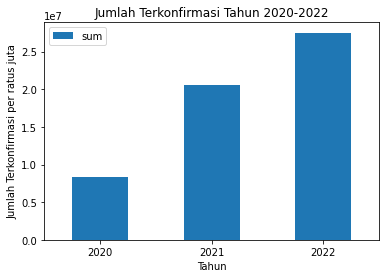

In [270]:
covid_kuartal_thn1 = covid_kuartal.groupby("Tahun")['Jumlah Terkonfirmasi'].agg([np.sum])
covid_kuartal_thn.plot(title = 'Jumlah Terkonfirmasi Tahun 2020-2022', kind='bar',rot = 0, ylabel = 'Jumlah Terkonfirmasi per ratus juta')

Trend jumlah orang terkonfirmasi Covid-19 di Provinsi New York, AS per kuartil pada tahun 2020 hingga 2022, terlihat terdapat peningkatan dan penurunan jumlah orang terkonfirmasi Covid-19 dengan trend meningkat.

Peningkatan tertinggi terjadi di Q2 tahun 2020 dengan jumlah terkonfirmasi sebanyak 636.379.340 orang

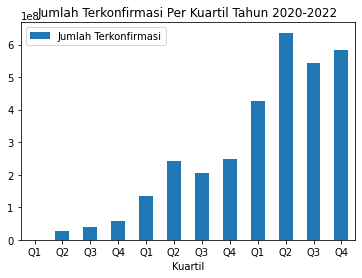

In [240]:
covid_kuartal.plot(title = 'Jumlah Terkonfirmasi Per Kuartil Tahun 2020-2022',x='Kuartil', y='Jumlah Terkonfirmasi', kind='bar', rot = 0)	

Pada tahun 2020 terjadi trend kenaikan jumlah terkonfirmasi dengan peningkatan tertinggi terjadi dari Q1 ke Q2.

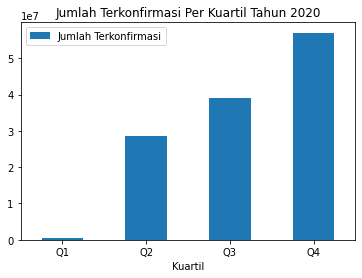

In [239]:
covid_kuartal.loc[0:3].plot(title = 'Jumlah Terkonfirmasi Per Kuartil Tahun 2020',x='Kuartil', y='Jumlah Terkonfirmasi', kind='bar', rot = 0)

Sementara itu pada tahun 2021 terjadi trend kenaikan dan penurunan jumlah terkonfirmasi dengan kenaikan terjadi pada Q1 ke Q2 dan Q3 ke Q4 lalu penurunan terjadi pada Q2 ke Q3.

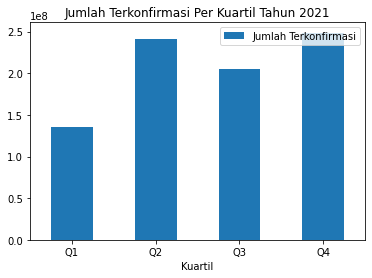

In [238]:
covid_kuartal.loc[4:7].plot(title = 'Jumlah Terkonfirmasi Per Kuartil Tahun 2021',x='Kuartil', y='Jumlah Terkonfirmasi', kind='bar', rot = 0)

Situasi yang sama terjadi pada tahun 2022 yaitu terjadi peningkatan dan penurunan jumlah terkonfirmasi dengan peningkatan terjadi pada Q1 ke Q2 dan Q3 ke Q4 dan penurunan pada Q2 ke Q3.

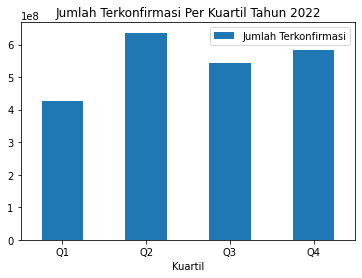

In [237]:
covid_kuartal.loc[8:11].plot(title = 'Jumlah Terkonfirmasi Per Kuartil Tahun 2022',x='Kuartil', y='Jumlah Terkonfirmasi', kind='bar', rot = 0)

Trend jumlah orang meninggal Covid-19 di Provinsi New York, AS pada tahun 2020 hingga 2022, terlihat terdapat peningkatan jumlah orang meninggal Covid-19 di Provinsi New York, AS dengan jumlah tertinggi terjadi di tahun 2022 dan terendah di tahun 2020.

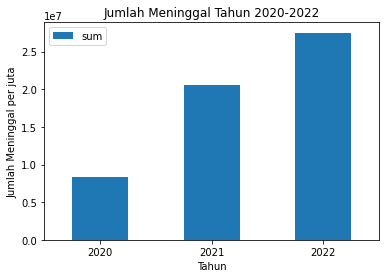

In [271]:
covid_kuartal_thn = covid_kuartal.groupby("Tahun")['Jumlah Meninggal'].agg([np.sum])
covid_kuartal_thn.plot(title = 'Jumlah Meninggal Tahun 2020-2022', kind='bar',rot = 0, ylabel = 'Jumlah Meninggal per juta')

Pada tahun 2020 terjadi peningkatan jumlah meninggal dengan peningkatan signifikan terjadi pada Q1 ke Q2.

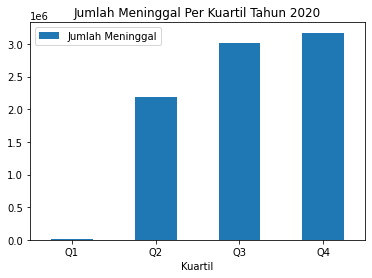

In [275]:
covid_kuartal.loc[0:3].plot(title = 'Jumlah Meninggal Per Kuartil Tahun 2020',x='Kuartil', y='Jumlah Meninggal', kind='bar',rot = 0)

Pada tahun 2021 terjadi peningkatan dan penurunan trend jumlah meninggal dimana trend jumlah tertinggi terjadi pada Q2.

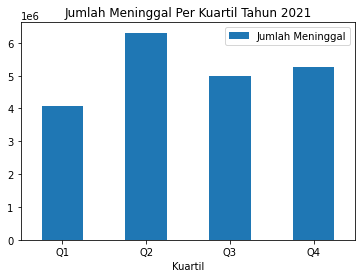

In [276]:
covid_kuartal.loc[4:7].plot(title = 'Jumlah Meninggal Per Kuartil Tahun 2021',x='Kuartil', y='Jumlah Meninggal', kind='bar',rot = 0)

Pada tahun 2022 terjadi naik turun trend cenderung meningkat.

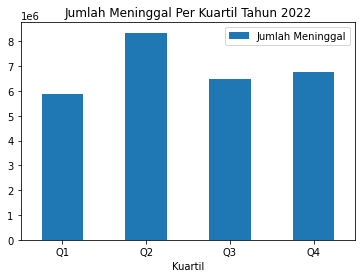

In [277]:
covid_kuartal.loc[8:11].plot(title = 'Jumlah Meninggal Per Kuartil Tahun 2022',x='Kuartil', y='Jumlah Meninggal', kind='bar',rot = 0)

### Conclusion, Assumsions, Overall Analysis

**Kesimpulan**
- Terjadi peningkatan Trend jumlah orang terkonfirmasi Covid-19 di Provinsi New York, AS dengan peningkatan signifikan terjadi pada 2021. Sementara itu, trend peningkatan juga terjadi pada jumlah meninggal dengan peningkatan signifkan terjadi pada tahun 2021.

- Trend jumlah orang terkonfirmasi Covid-19 di Provinsi New York, AS per kuartil pada tahun 2020 hingga 2022, terlihat terdapat peningkatan dan penurunan jumlah orang terkonfirmasi Covid-19 dengan trend meningkat.
Peningkatan tertinggi terjadi di Q2 tahun 2020. Sementara itu, trend jumlah orang meninggal Covid-19 di Provinsi New York, AS pada tahun 2020 hingga 2022, terlihat terdapat peningkatan jumlah orang meninggal Covid-19 di Provinsi New York, AS dengan jumlah tertinggi terjadi di tahun 2022 dan terendah di tahun 2020.

**Asumsi**
- Terjadinya peningkatan trend yang signifikan pada tahun 2021 kemungkinan terjadi karena pada tahun 2021 terdapat beberapa varian virus COVID-19 yang tersebar dan pada tahun tersebut mayoritas penduduk masih belum tervaksin.
- Tingginya tingkat infektivitas terjadi karena Provinsi New York merupakan salah satu Provinsi dengan penduduk terbanyak di Amerika Serikat.
- Terjadinya naik turun trend disebabkan oleh penyebaran varian-varian baru virus COVID-19 di Amerika Serikat dan peningkatan imunitas penduduk Amerika Serikat.

**Overall Analysis**
- Bahwa terjadi peningkatan yang signifikan terhadap jumlah orang yang terkonfirmasi dan orang meninggal di Provinsi New York, AS tahun 2020 hingga tahun 2022.